# Reduccion de dimensionalidad 
**Definicion** Es transformar los datos de un espacio de muchas dimensiones a uno de menor numero de dimensiones.

1. Reducir complejidad 
2. Remover redundancia de los daots
3. Identificar los factores mas relevantes (ruido)
4. Reducir el tiempo computacional para procesos siguientes
5. Facilitar clustering de manera que no se introduzcan muchas dimensiones
6. Visualizacion de datos

Esto entre otras muchas bondades

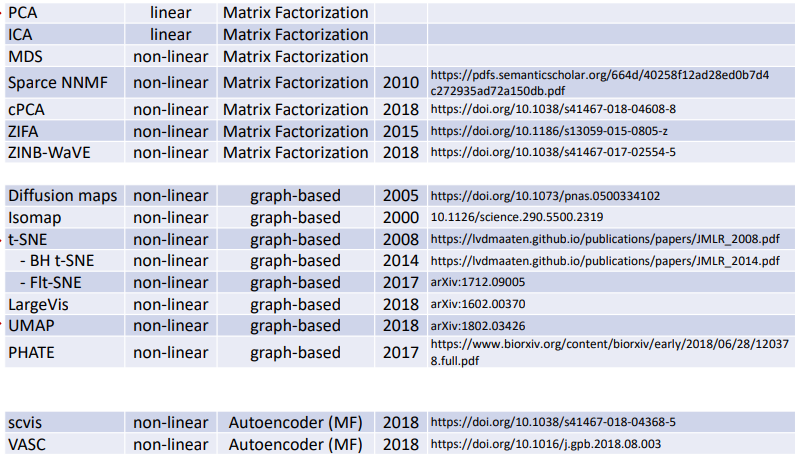


# 1) PCA

El análisis de componentes principales (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

Supóngase que existe una muestra con  n  individuos cada uno con  p  variables ( $X_1 , X_2 , ...,  X_p$), es decir, el espacio muestral tiene  p  dimensiones. PCA permite encontrar un numero de factores subyacentes  ($z<p$) que explican aproximadamente lo mismo que las  p  variables originales. Donde antes se necesitaban  p  valores para caracterizar a cada individuo, ahora bastan z  valores. Cada una de estas z nuevas variables recibe el nombre de componente principal.

Dos de las principales aplicaciones del PCA son la visualizacion y el preprocesado de predictores previo ajuste de modelos supervisados.

La libreria scikitlearn contiene la clase ```sklearn.decomposition.PCA``` que implementa la mayoria de las funcionalidades necesarias para crear y utilizar modelos PCA. Para visualizaciones, ```Yellowbrick``` ofrece funcionalidades extra.

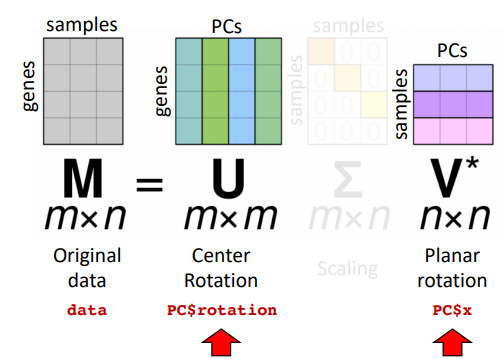




In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


UDArrests contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y secuestros (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA para la decada de los 80

In [2]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos.head(10)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [ ]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [ ]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

**OJO** Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable Assault, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.

La clase sklearn.decomposition.PCA incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento ```n_components``` determina el número de componentes calculados. Si se indica None, se calculan todas las posibles (min(filas, columnas) - 1).

Por defecto, PCA() centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas. Una forma de hacerlo es combinar un ```StandardScaler()``` y un ```PCA()``` dentro de un pipeline. Para más información sobre el uso de pipelines consultar ```Pipeline``` y ```ColumnTransformer```.

In [3]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [4]:
pca_pipe.fit(datos)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

```components_``` contiene el valor de los loadings  ϕ  que definen cada componente (eigenvector). Las filas se corresponden con las componentes principales (ordenadas de mayor a menor varianza explicada). Las filas se corresponden con las variables de entrada

In [5]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


# Reconstruccion de los ejes
La primera componente tiene la siguiente combinacion lineal de variables


$$PC1=0.535899 Murder+0.583184 Assault+0.278191 UrbanPop+0.543432 Rape$$

Los pesos asignados en la primera componente a las variables Assault, Murder y Rape son aproximadamente iguales entre ellos y superiores al asignado a UrbanPoP. Esto significa que la primera componente recoge mayoritariamente la información correspondiente a los delitos. En la segunda componente, es la variable UrbanPoP es la que tiene con diferencia mayor peso, por lo que se corresponde principalmente con el nivel de urbanización del estado. Si bien en este ejemplo la interpretación de las componentes es bastante clara, no en todos los casos ocurre lo mismo, sobre todo a medida que aumenta el número de variables.

La influencia de las variables en cada componente analizarse visualmente con un gráfico de tipo heatmap.

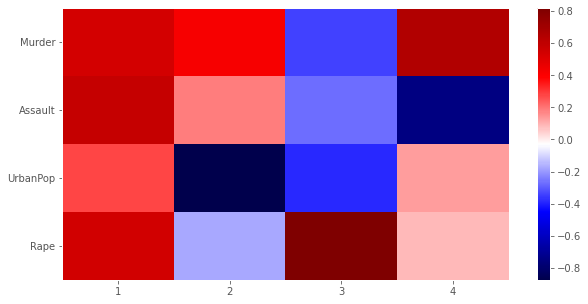

In [6]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='seismic', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos ```explained_variance_``` y ```explained_variance_ratio_``` del modelo.

In [7]:
modelo_pca.n_components_

4

In [8]:
np.arange(len(datos.columns)) + 1

array([1, 2, 3, 4])

In [9]:
modelo_pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.62006039 0.24744129 0.0891408  0.04335752]


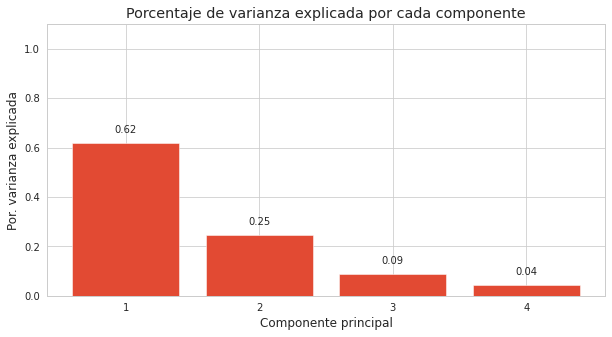

In [10]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el 62% de la varianza observada en los datos y la segunda el 24.7%. Las dos últimas componentes no superan por separado el 1% de varianza explicada.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.62006039 0.86750168 0.95664248 1.        ]


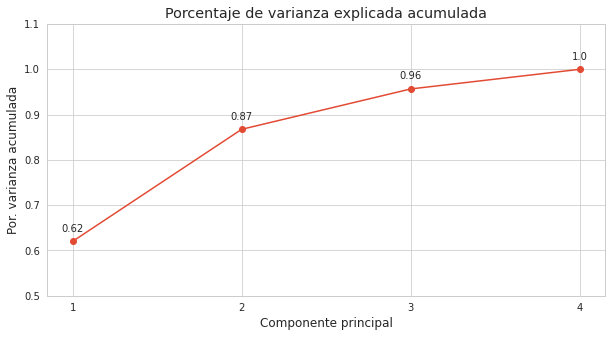

In [11]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0.5, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el 87% de la varianza observada.

# Proceso de transformacion

Una vez entrenado el modelo, con el método ```transform()``` se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.




In [12]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = datos.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


La transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables. Puede calcularse de forma manual:

In [ ]:
scale(datos)

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [13]:
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


                 PC1       PC2       PC3       PC4         val
Alabama     0.985566  1.133392 -0.444269  0.156267     Alabama
Alaska      1.950138  1.073213  2.040003 -0.438583      Alaska
Arizona     1.763164 -0.745957  0.054781 -0.834653     Arizona
Arkansas   -0.141420  1.119797  0.114574 -0.182811    Arkansas
California  2.523980 -1.542934  0.598557 -0.341996  California


Text(0, 0.5, 'PC2')

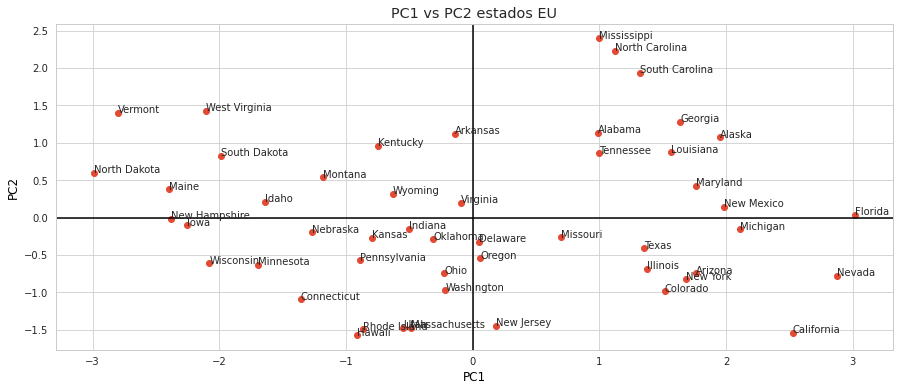

In [14]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,6))
proyecciones['val']=proyecciones.index
print(proyecciones.head())


ax = proyecciones.set_index('PC1')['PC2'].plot(style='o')

def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], str(point['val']))

label_point(proyecciones.PC1, proyecciones.PC2, proyecciones.val, ax)
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.title('PC1 vs PC2 estados EU')
plt.xlabel('PC1',color='k')
plt.ylabel('PC2',color='black')

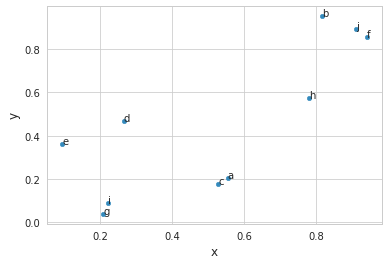

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string

df = pd.DataFrame({'x':np.random.rand(10), 'y':np.random.rand(10)}, 
                  index=list(string.ascii_lowercase[:10]))
df
fig, ax = plt.subplots()
df.plot('x', 'y', kind='scatter', ax=ax)

for k, v in df.iterrows():
    ax.annotate(k, v)

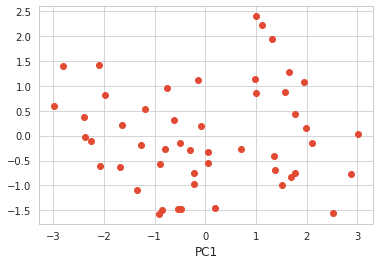

In [ ]:
ax = proyecciones.set_index('PC1')['PC2'].plot(style='o')

In [ ]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(proyecciones.PC1, proyecciones.PC2, proyecciones.index, ax)

draw()

TypeError: ignored

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


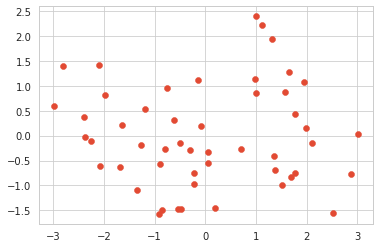

In [ ]:
lista= list(proyecciones.index)
print(lista)
plt.scatter(proyecciones.PC1,proyecciones.PC2,label=lista)

# Reconstruccion de datos originales

Puede revertirse la transformación y reconstruir el valor inicial con el método ```inverse_transform()```. Es importante tener en cuenta que, la reconstrucción, solo será completa si se han incluido todas las componentes.

In [ ]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(X=proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = datos.columns,
                    index   = datos.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(datos.head())

------------------
Valores originales
------------------


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236.0,58.0,21.2
Alaska,10.0,263.0,48.0,44.5
Arizona,8.1,294.0,80.0,31.0
Arkansas,8.8,190.0,50.0,19.5
California,9.0,276.0,91.0,40.6


---------------------
Valores reconstruidos
---------------------


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


# 2) ICA

El análisis de componentes independientes (ICA) es una técnica de aprendizaje automático para separar fuentes independientes de una señal mixta. A diferencia del análisis de componentes principales que se enfoca en maximizar la varianza de los puntos de datos, el análisis de componentes independientes se enfoca en la independencia, es decir, componentes independientes.

**Problema**: extraer señales de fuentes independientes de una señal mixta compuesta por las señales de esas fuentes.
**Dado**: señal mixta de cinco fuentes independientes diferentes.
**Objetivo**: descomponer la señal mixta en fuentes independientes:

1. Fuente 1
2. Fuente 2
3. Fuente 3
4. Fuente 4
5. Fuente 5

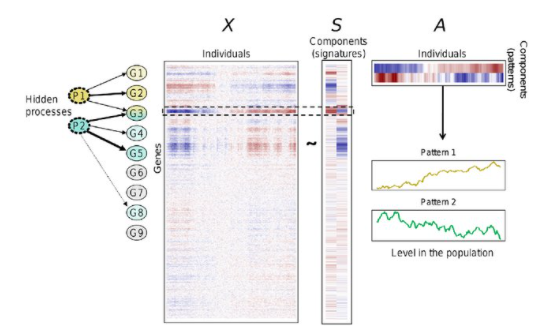

EL modelo se convierte en :

$$S = Wx$$

Hay diferentes aproximaciones computacionales que se basan en el criterio de informacion 

1. Divergencia de Kullback-Leibler (distancia entre funciones de densidad)
2. Entropia negativa (mide la diferencia de una muestra respecto a una distribucion Gaussiana con la misma varianza)
3. Densidad producto

S= es un vector p dimensional representando el input multivariado de las medidas

x = vector p dimensional de fuentes latentes cuyas componentes son independientes y distribuidas normalmente

A= es una matriz pxp

Dada la observaciones $x_1, x_2, ...,x_N$ de X, los objetivos del ICA son:

1. Estimar A
2. Estimar las distribuciones fuente $S_j \sim f_s, j=1, ...,p$

Se asume que $E(S)=0, Cov(S)=I$ y adicionalmente $Cov(S)= Cov(Wx) =W W^T$

Resumiendo tenemos que realizar estos pasos

1. Centrar x restando la media
2. Proceso de whitening de x (Descomposicion SVD)
3. Elija un valor inicial aleatorio para la matriz de desmezcla w
4. Calcule el nuevo valor de w
5. Normalizar w
6. Compruebe si el algoritmo ha converge y, si no, vuelva al paso 4
7. Tomar el producto escalar de w y x para obtener las señales de fuente independientes

Antes de aplicar el algoritmo ICA, primero debemos "blanquear" nuestra señal. “Blanquear” una señal dada significa que la transformamos de tal manera que se eliminan las correlaciones potenciales entre sus componentes (covarianza igual a 0) y la varianza de cada componente es igual a 1. Otra forma de verlo es que el La matriz de covarianza de la señal blanqueada será igual a la matriz de identidad.

<Figure size 432x288 with 0 Axes>

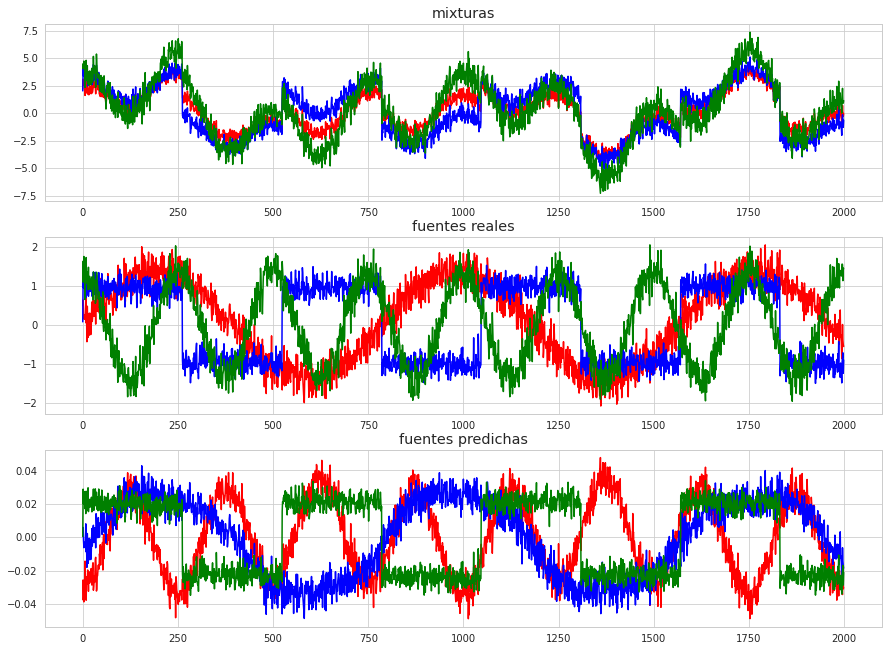

In [ ]:
from sklearn.decomposition import FastICA
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = np.cos(2 * np.pi * time)
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)
S /= S.std(axis=0)
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
X = np.dot(S, A.T)
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)
fig = plt.figure()
models = [X, S, S_]
names = ['mixturas', 'fuentes reales', 'fuentes predichas']
colors = ['red', 'blue', 'green']
plt.figure(figsize=(15,15))
for i, (name, model) in enumerate(zip(names, models)):
    plt.subplot(4, 1, i+1)
    plt.title(name)
    for sig, color in zip (model.T, colors):
        plt.plot(sig, color=color)
        
fig.tight_layout()        
plt.show()